In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install missingno

In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC

In [ ]:
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets
# metadata
# print(f"\n{cdc_diabetes_health_indicators.metadata=}")
# variable information
# print(f"\n{cdc_diabetes_health_indicators.variables=}")

# Exploración y entendimiento de los datos

---



In [ ]:
# Estadísticas descriptivas
print(X.describe())

              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.000000       0.000000  

In [ ]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [ ]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


Analizando cada variable, encontramos lo siguiente:
**HighBP**: Presión arterial alta (1 = sí, 0 = no).

**HighChol**: Colesterol alto (1 = sí, 0 = no).

**CholCheck**: Chequeo de colesterol en los últimos 5 años (1 = sí, 0 = no).

**BMI**: Índice de masa corporal.

**Smoker**: Fumador (1 = sí, 0 = no).

**Stroke**: Ha tenido un derrame cerebral (1 = sí, 0 = no).

**HeartDiseaseorAttack**: Ha tenido enfermedad del corazón o un ataque al corazón (1 = sí, 0 = no).

**PhysActivity**: Actividad física (1 = sí, 0 = no).

**Fruits**: Consumo de frutas (1 = sí, 0 = no).

**Veggies**: Consumo de vegetales (1 = sí, 0 = no).

**HvyAlcoholConsump**: Consumo pesado de alcohol (1 = sí, 0 = no).

**AnyHealthcare**: Acceso a atención médica (1 = sí, 0 = no).

**NoDocbcCost**: No visitó al doctor debido al costo (1 = sí, 0 = no).

**GenHlth**: Salud general (valorado de 1 a 5).

**MentHlth**: Días de mala salud mental en el último mes.

**PhysHlth**: Días de mala salud física en el último mes.

**DiffWalk**: Dificultad para caminar sin ayuda (1 = sí, 0 = no).

**Sex**: Sexo (0, 1).

**Age**: Categoría de edad.

**Education**: Nivel de educación.

**Income**: Categoría de ingreso.


En cuanto a las estadísticas descriptivas de las variables del dataset encontramos lo siguiente:

**Variables Binarias (Sí/No)**: La mayoría de las variables como HighBP, HighChol, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, y DiffWalk son binarias, indicando presencia (1) o ausencia (0) de cada condición o comportamiento.

**BMI**: El Índice de Masa Corporal (BMI) tiene un rango de 12 a 98, con una media de 28.38, lo que sugiere una población con una tendencia hacia el sobrepeso, considerando que un BMI de 25 a 29.9 se considera sobrepeso según los estándares de la OMS.

**GenHlth**: La salud general (valorada de 1 a 5) tiene una media de 2.51, lo que sugiere que en promedio, la percepción de la salud general de los encuestados es relativamente buena.

**MentHlth y PhysHlth**: Los días de mala salud mental y física en el último mes tienen medias de 3.18 y 4.24 días respectivamente, lo que indica una cierta carga de enfermedad en la población pero con una gran variabilidad, como lo sugieren las desviaciones estándar.

**Sexo, Edad, Educación e Ingreso**: Estas variables categóricas muestran una distribución variada entre los encuestados, con Sex teniendo casi una distribución equitativa (0.44 en promedio, posiblemente 0 = mujer, 1 = hombre), Age mostrando una categorización de edad (con valores de 1 a 13), Education y Income también categorizadas, lo que sugiere niveles variados de educación e ingresos entre los participantes.

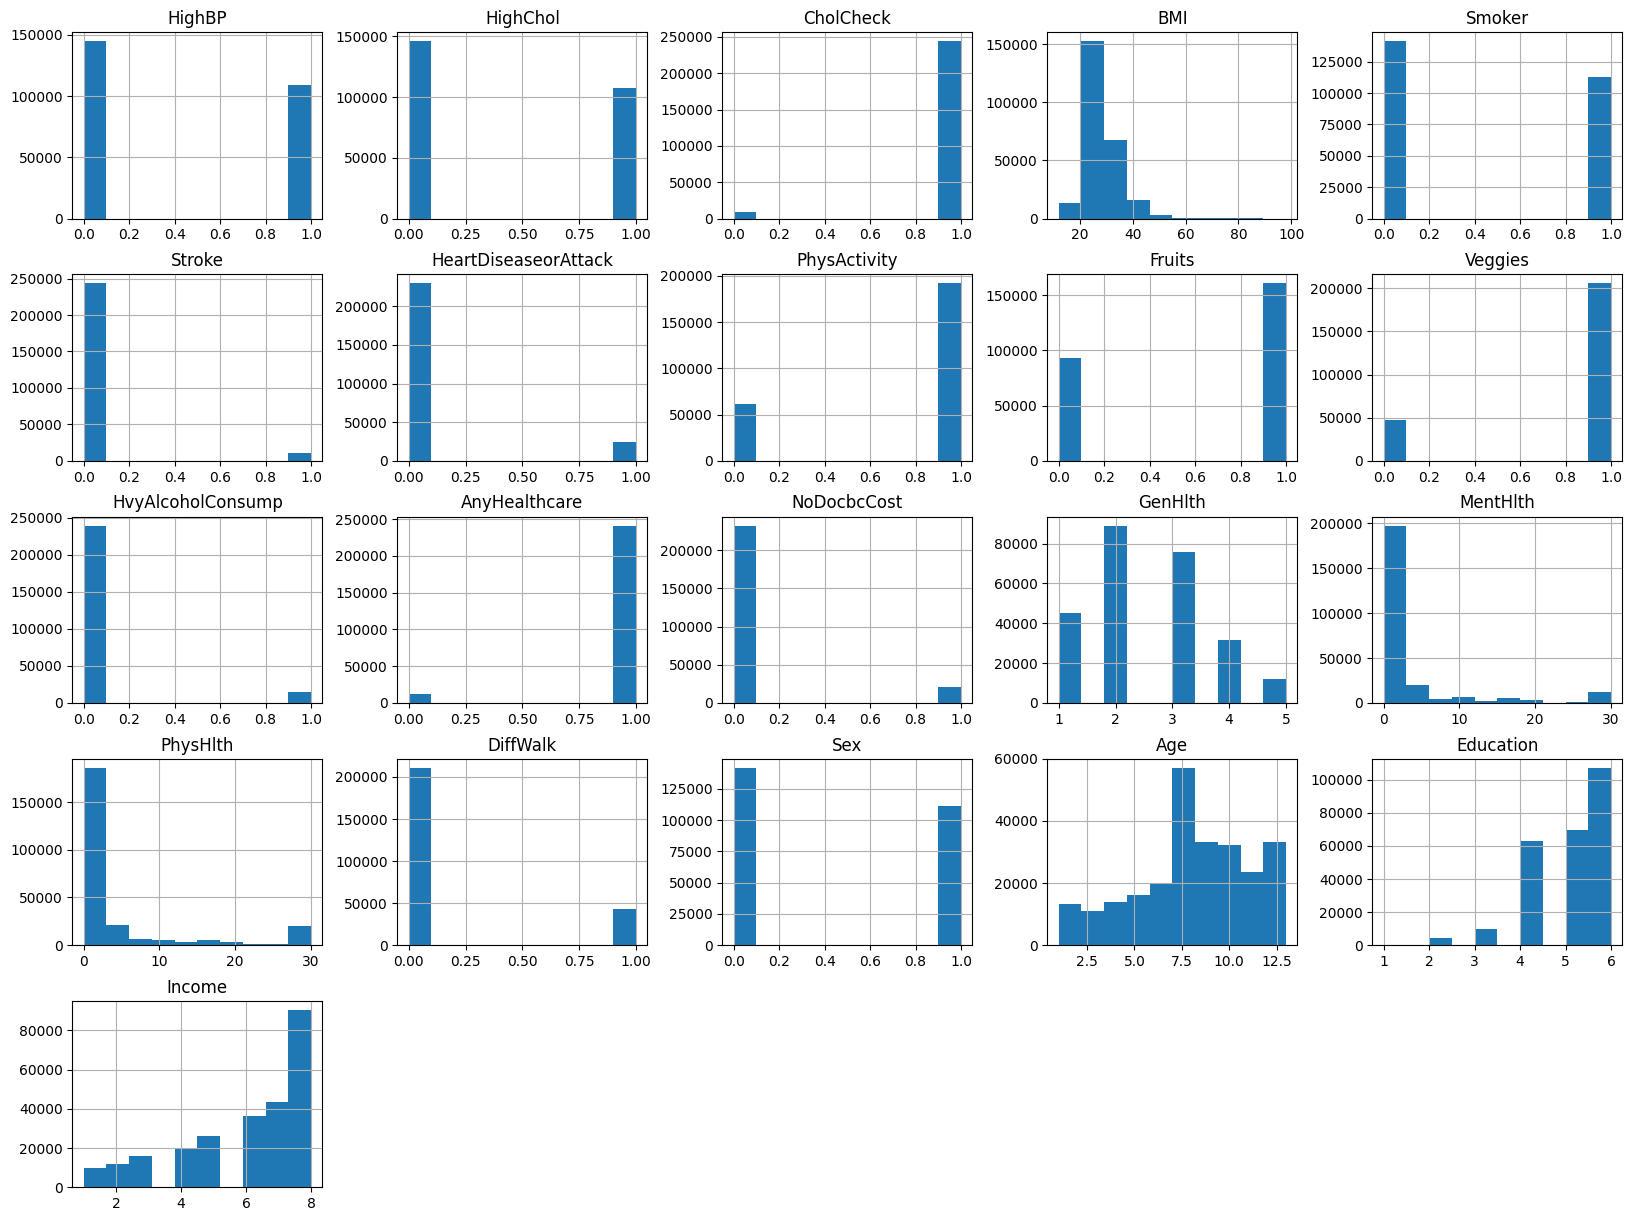

In [ ]:
# Histogramas
X.hist(figsize=(20, 15))
plt.show()

**Variables Binarias**: Las variables binarias como HighBP, HighChol, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, y DiffWalk muestran distribuciones que reflejan la proporción de respuestas afirmativas y negativas. Por ejemplo, se observa que una mayor proporción de participantes reporta tener acceso a atención médica (AnyHealthcare) y realizar actividad física (PhysActivity), mientras que una menor proporción reporta consumo pesado de alcohol (HvyAlcoholConsump) o haber tenido un derrame cerebral (Stroke).

**BMI**: La distribución del Índice de Masa Corporal (BMI) parece sesgada hacia la derecha, indicando que una proporción significativa de la población tiene un BMI que se considera sobrepeso o incluso obesidad.

**Salud General (GenHlth)**: La distribución de las percepciones de salud general muestra una tendencia hacia respuestas más positivas, con un pico en valores más bajos (mejor salud general).

**Días de Mala Salud Mental y Física (MentHlth y PhysHlth)**: Ambas variables muestran una alta frecuencia de cero días reportados, lo que indica que muchos participantes no experimentaron días de mala salud mental o física en el último mes. Sin embargo, hay una cola larga hacia la derecha, lo que sugiere que una minoría reporta un número significativo de días afectados.

**Dificultad para Caminar (DiffWalk)**: Una mayoría de participantes indica no tener dificultad para caminar, aunque hay una proporción no despreciable que sí reporta este problema.

**Variables Demográficas (Sex, Age, Education, Income)**: Las distribuciones de estas variables sugieren una variada composición demográfica de los participantes. La edad muestra una distribución que sugiere una mayor proporción de participantes en categorías de edad media y avanzada. La educación y el ingreso muestran una variedad de niveles, con una distribución que permite inferir cierta relación entre nivel educativo y categoría de ingreso.

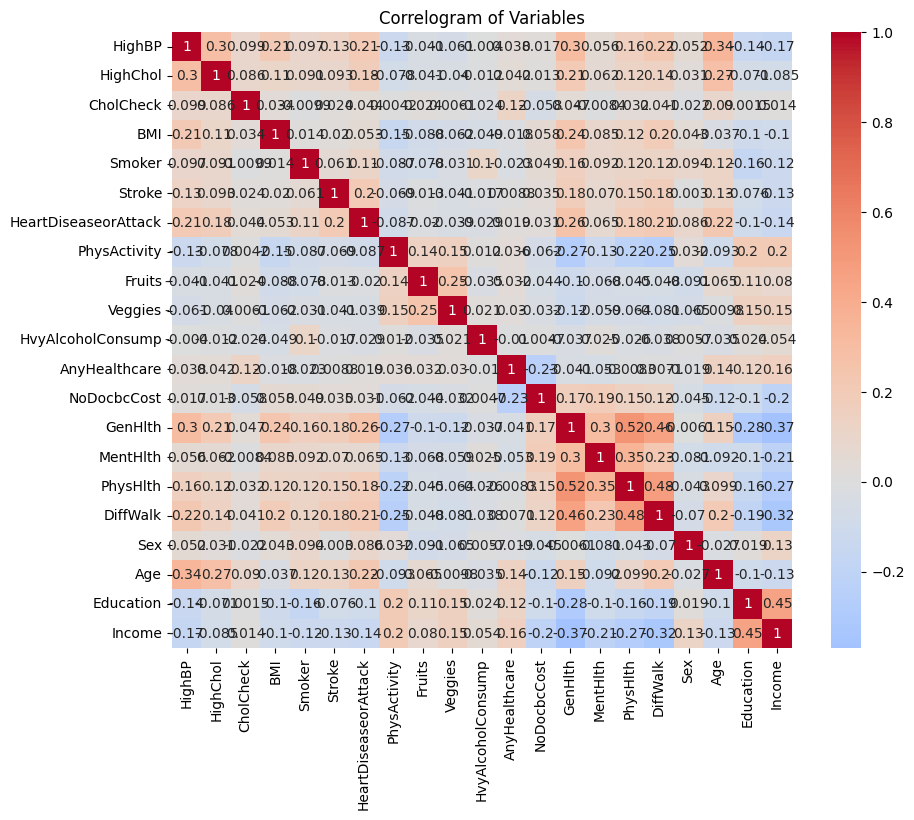

In [ ]:
# Realizaremos un análisis preliminar de las variables en el conjunto de datos.

# Correlograma para visualizar correlaciones entre características. (Se
# incluyen todas las variables)
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlogram of Variables")
plt.show()

In [ ]:
# Obtendremos solamente las variables que tengan por lo menos una correlación
# con alguna otra que sea mayor a |0.3|

# Calcula la matriz de correlación
correlation_matrix = X.corr().abs()
# Encuentra las variables que cumplen con el criterio de correlación
high_correlation_vars = (correlation_matrix > 0.3) & (correlation_matrix < 1.0)
# Crea una lista de variables que cumplen con la condición
variables_list = []
for column in high_correlation_vars:
    correlated_vars = high_correlation_vars[column][
        high_correlation_vars[column]].index.tolist()
    if len(correlated_vars) > 1:
        variables_list.extend(correlated_vars)
# Elimina duplicados
variables_list = list(set(variables_list))
variables_list

['MentHlth',
 'Age',
 'Income',
 'DiffWalk',
 'GenHlth',
 'HighBP',
 'PhysHlth',
 'Education']

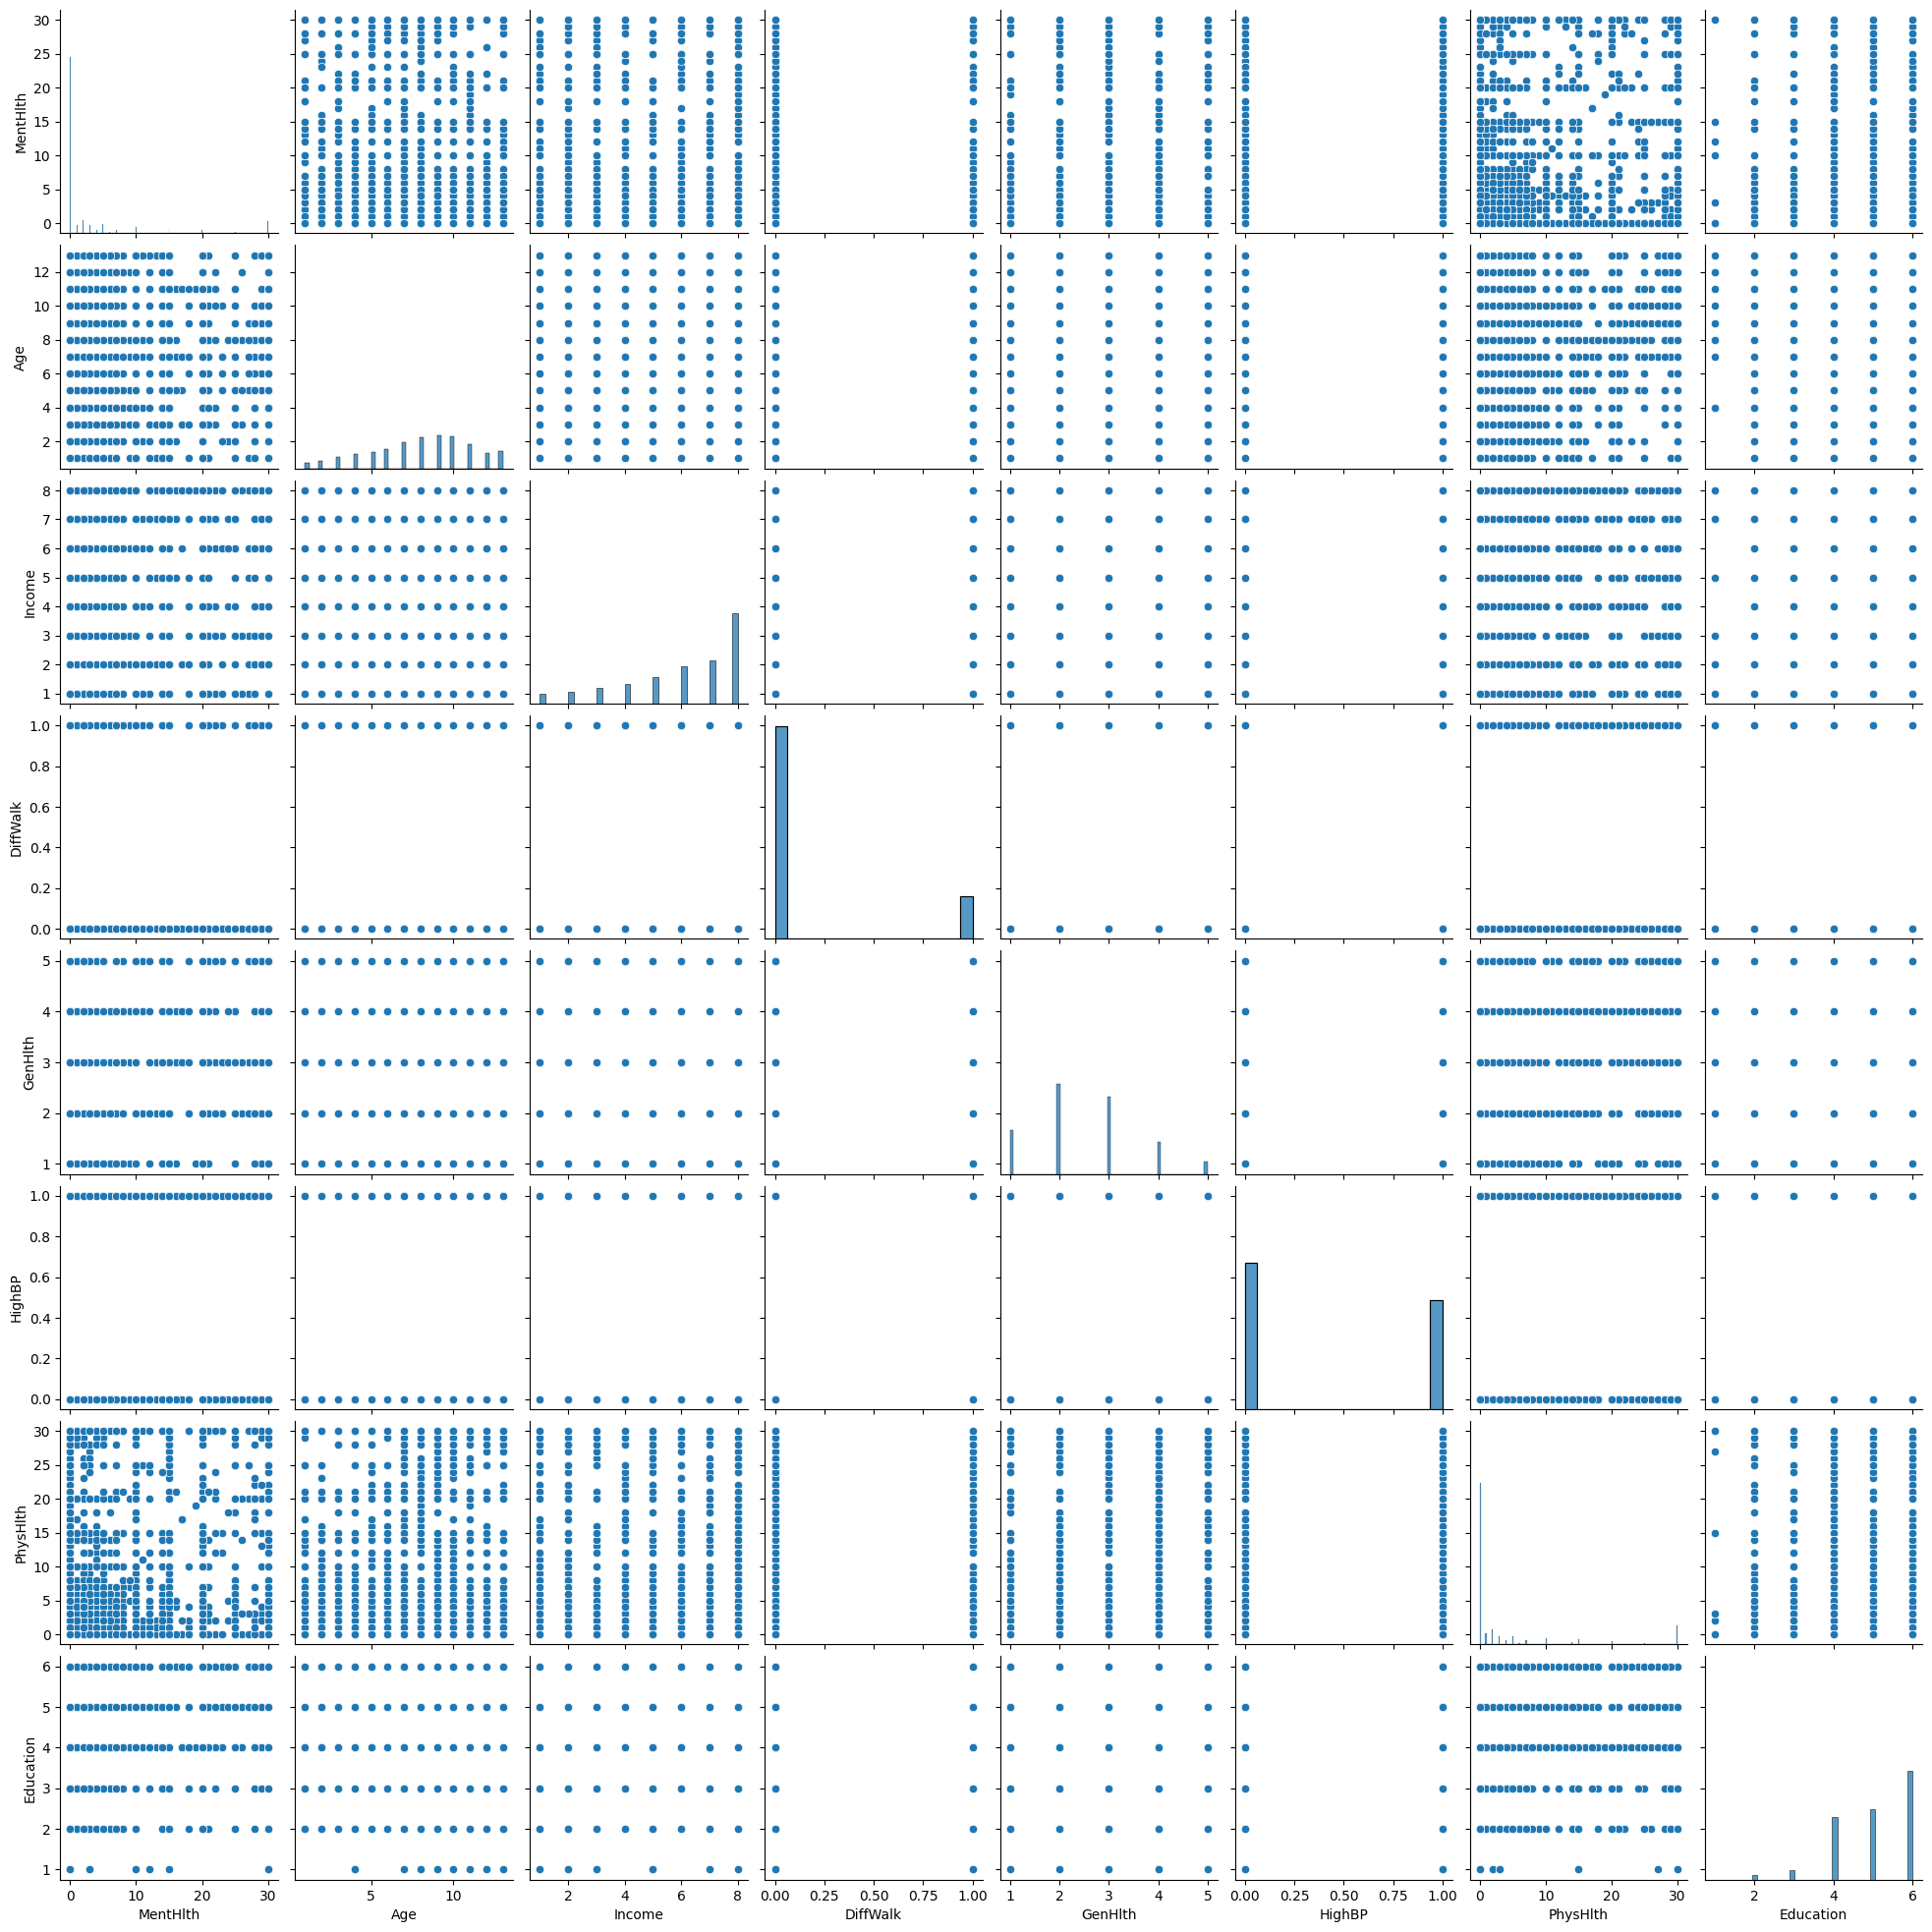

In [ ]:
# Correlograma
sns.pairplot(X[variables_list].sample(frac=0.1))
plt.show()

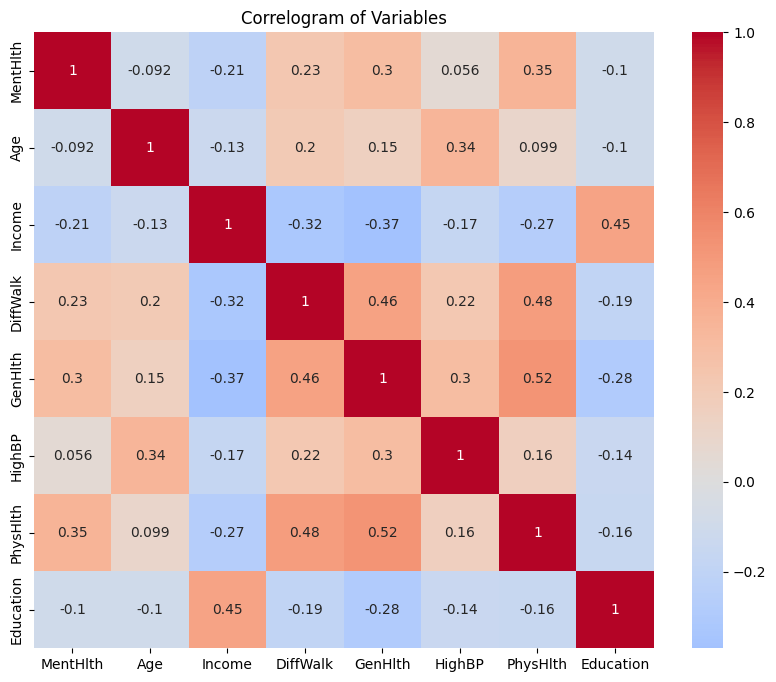

In [ ]:
# Correlograma para visualizar correlaciones entre características. (Se
# incluyen solo las variables con al menos una cor > |0.3|)
correlation_matrix = X[variables_list].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlogram of Variables")
plt.show()

In [ ]:
# Obtener los diagramas de las variables con valores 1 y 0
binary_variables = X.columns[(X.nunique() == 2) & (
    X.dtypes == 'int64')].tolist()
# Variables extra considerables a añadir
var_extra = ['Age', 'GenHlth', 'Income']
binary_variables.extend(var_extra)
binary_variables

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex',
 'Age',
 'GenHlth',
 'Income']

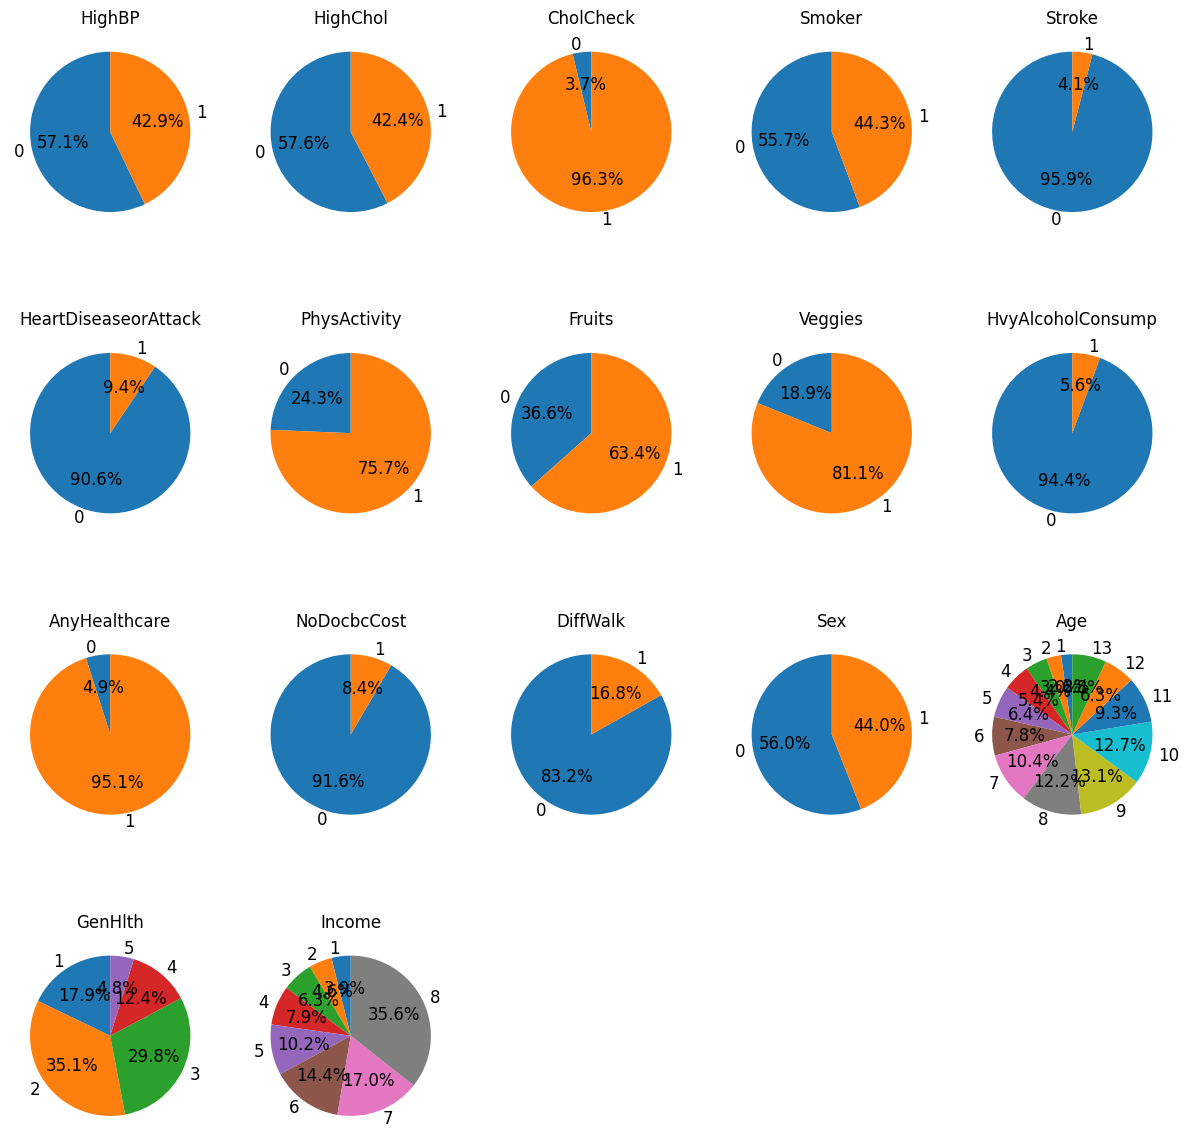

In [ ]:
# Distribuciones de las variables con valores 1 y 0
plt.figure(figsize=(15,15))
for i, var in enumerate(binary_variables):
  plt.subplot(4, 5, i+1)
  data = X.groupby(var).size()
  labels = data.keys()
  plt.pie(x=data, autopct= "%.1f%%", labels=labels, startangle=90,
          textprops = {'fontsize':12})
  plt.title(("{}").format(var))
plt.show()

### Distribución de faltantes en los datos

<Axes: >

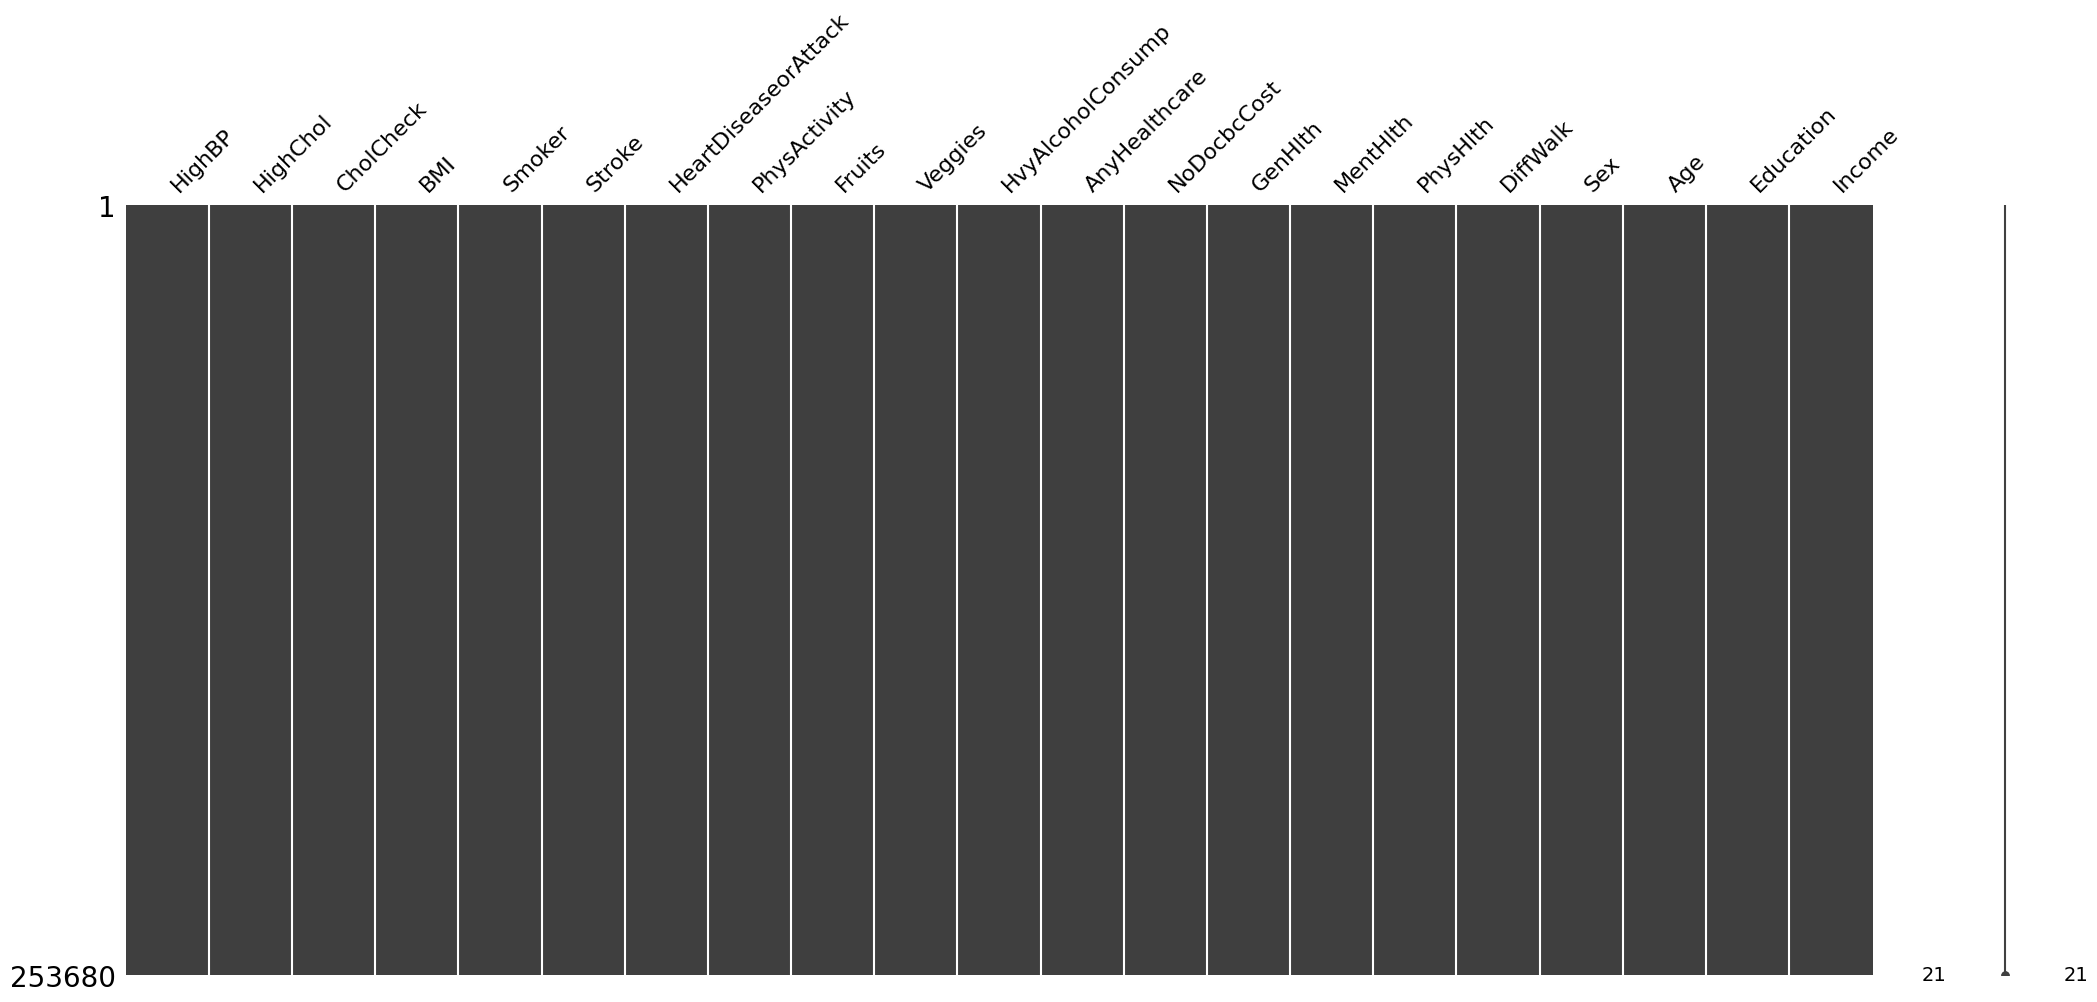

In [ ]:
# Matriz de datos faltantes
msno.matrix(X)

Como se puede observar, los datos ya están previamente tratados y no hay N/A o vacíos en este dataset.

# Preprocesamiento de datos

La mayoría de datos ya han sido tratados por la comunidad, por lo que la intervención en estos aspectos como campos vacíos, datos corruptos y temas por el estilo, ya fueron tratados.

In [ ]:
# Agrupación de edades
agrupaciones = [(1,3), (4, 6), (7, 8), (9, 13)]

def agrupa_edades(val):
  for i, (ini, fin) in enumerate(agrupaciones):
    if ini <= val <= fin:
      return i+1

X['Nueva_edad'] = X['Age'].apply(agrupa_edades)

X['Nueva_edad'].unique()

<ipython-input-4-a836197824de>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Nueva_edad'] = X['Age'].apply(agrupa_edades)


array([4, 3, 2, 1])

In [ ]:
df = pd.concat([X, y], axis=1)
summary = df.groupby('Nueva_edad')['Diabetes_binary'].agg(['count', 'sum'])
# Calcular el porcentaje de participación para cada grupo de 'Age'
summary['participacion'] = (summary['sum'] / summary['count']) * 100
# Imprimir el resultado
print(summary)

             count    sum  participacion
Nueva_edad                              
1            24421    532       2.178453
2            49799   3419       6.865600
3            57146   7351      12.863543
4           122314  24044      19.657603


In [ ]:
df = pd.concat([X, y], axis=1)
summary = df.groupby('Income')['Diabetes_binary'].agg(['count', 'sum'])
# Calcular el porcentaje de participación para cada grupo de 'Age'
summary['participacion'] = (summary['sum'] / summary['count']) * 100
# Imprimir el resultado
print(summary)

        count   sum  participacion
Income                            
1        9811  2383      24.289063
2       11783  3086      26.190274
3       15994  3568      22.308366
4       20135  4054      20.134095
5       25883  4504      17.401383
6       36470  5291      14.507815
7       43219  5265      12.182142
8       90385  7195       7.960392


In [ ]:
# Agrupación de ingresos
agrupaciones = [(1,4), (5, 7), (8, 9)]

def agrupa_ingreso(val):
  for i, (ini, fin) in enumerate(agrupaciones):
    if ini <= val <= fin:
      return i+1

X['Nuevo_Income'] = X['Income'].apply(agrupa_ingreso)

X['Nuevo_Income'].unique()

array([1, 3, 2])

In [ ]:
df = pd.concat([X, y], axis=1)
summary = df.groupby('Nuevo_Income')['Diabetes_binary'].agg(['count', 'sum'])
# Calcular el porcentaje de participación para cada grupo de 'Age'
summary['participacion'] = (summary['sum'] / summary['count']) * 100
# Imprimir el resultado
print(summary)

               count    sum  participacion
Nuevo_Income                              
1              57723  13091      22.679001
2             105572  15060      14.265146
3              90385   7195       7.960392


In [ ]:
X
df = X.drop(['Age', 'Income'], axis=1)
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Education,Nueva_edad,Nuevo_Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,4,4,1
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,6,3,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,4,4,3
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,3,4,2
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,6,2,2
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,5,1,1
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,5,3,1


In [ ]:
# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Normalización
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_scaled)


In [ ]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=0.95) # Conservar el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)


In [ ]:
y.sum()/y.shape[0]

Diabetes_binary    0.139333
dtype: float64

# Modelos

In [ ]:
# Separacion de bases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_1d = np.ravel(y_train)
# y_train_1d



*   **Random forest**



In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(X_train, y_train_1d)
prediccionRF=clfRF.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionRF, pos_label=0)
AUCRF=metrics.auc(fpr, tpr)
AUCRF

prediccionRF_matrix = clfRF.predict(X_test)
matriz_confusion = confusion_matrix(y_test, prediccionRF_matrix)
exactitud_RF = accuracy_score(y_test, prediccionRF_matrix)
sensibilidad_RF = recall_score(y_test, prediccionRF_matrix)
especificidad_RF = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])
precision_RF = precision_score(y_test, prediccionRF_matrix)
print("Exactitud del modelo:", exactitud_RF)
print("Precisión del modelo:", precision_RF)
print("Sensibilidad del modelo:", sensibilidad_RF)
print("Especificidad del modelo:", especificidad_RF)
print("AUC del modelo:", AUCRF)

Exactitud del modelo: 0.860151897403553
Precisión del modelo: 0.48073836276083465
Sensibilidad del modelo: 0.17115915801504905
Especificidad del modelo: 0.9704138404085054
AUC del modelo: 0.7984276021976289


*   **Lasso**

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el clasificador Lasso
lasso_classifier = LogisticRegression(penalty='l1', solver='liblinear')

# Entrenar el clasificador
lasso_classifier.fit(X_train_scaled, y_train_1d)
prediccionLasso=lasso_classifier.predict_proba(X_test_scaled)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionLasso, pos_label=0)
AUCLasso=metrics.auc(fpr, tpr)

prediccionLasso_matrix = lasso_classifier.predict(X_test_scaled)
matriz_confusion = confusion_matrix(y_test, prediccionLasso_matrix)
exactitud_Lasso = accuracy_score(y_test, prediccionLasso_matrix)
sensibilidad_Lasso = recall_score(y_test, prediccionLasso_matrix)
especificidad_Lasso = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])
precision_Lasso = precision_score(y_test, prediccionLasso_matrix)
print("Exactitud del modelo:", exactitud_Lasso)
print("Precisión del modelo:", precision_Lasso)
print("Sensibilidad del modelo:", sensibilidad_Lasso)
print("Especificidad del modelo:", especificidad_Lasso)
print("AUC del modelo:", AUCLasso)
precision_Lasso

Exactitud del modelo: 0.8661962577525492
Precisión del modelo: 0.5516002612671457
Sensibilidad del modelo: 0.1608724640441947
Especificidad del modelo: 0.9790717170947336
AUC del modelo: 0.8235774223027282


0.5516002612671457

### Balanceo de información

Text(0, 0.5, 'Cantidad')

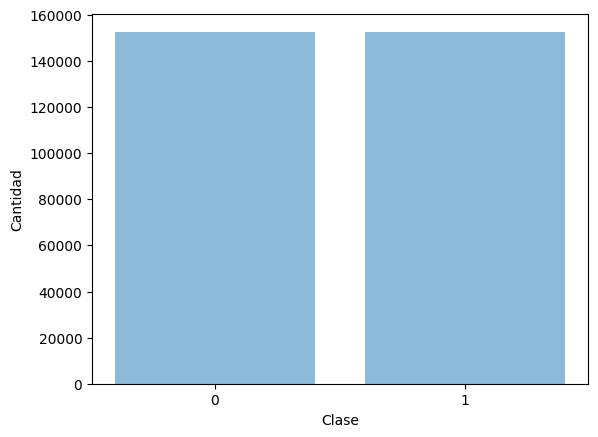

In [ ]:
X_train, X_test, y_train, y_test
sm = SMOTE()  #Smote con parámetros por default
X_train_2, y_train_2 = sm.fit_resample(X_train, y_train)
y_train_1d_2 = np.ravel(y_train_2)


unique, counts = np.unique(y_train_2, return_counts=True)

# Crear la gráfica de barras
plt.bar(unique, counts, align='center', alpha=0.5)

# Etiquetas de clase
plt.xticks(unique)
plt.xlabel('Clase')
plt.ylabel('Cantidad')

*   **Lasso balanceado**

In [ ]:
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)

lasso_classifier_Balanceado = LogisticRegression(penalty='l1', solver='liblinear')

# Entrenar el clasificador
lasso_classifier_Balanceado.fit(X_train_scaled_2, y_train_1d_2)
prediccionLasso_Balanceado=lasso_classifier_Balanceado.predict_proba(X_test_scaled)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionLasso_Balanceado, pos_label=0)
AUCLasso_Balanceado=metrics.auc(fpr, tpr)

prediccionLasso_matrix_Balanceado = lasso_classifier_Balanceado.predict(X_test_scaled)
matriz_confusion = confusion_matrix(y_test, prediccionLasso_matrix_Balanceado)
exactitud_Lasso_Balanceado = accuracy_score(y_test, prediccionLasso_matrix_Balanceado)
sensibilidad_Lasso_Balanceado = recall_score(y_test, prediccionLasso_matrix_Balanceado)
especificidad_Lasso_Balanceado = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])
precision_Lasso_Balanceado = precision_score(y_test, prediccionLasso_matrix_Balanceado)
print("Exactitud del modelo:", exactitud_Lasso_Balanceado)
print("Precisión del modelo:", precision_Lasso_Balanceado)
print("Sensibilidad del modelo:", sensibilidad_Lasso_Balanceado)
print("Especificidad del modelo:", especificidad_Lasso_Balanceado)
print("AUC del modelo:", AUCLasso_Balanceado)


Exactitud del modelo: 0.6097182802480816
Precisión del modelo: 0.2410249494268375
Sensibilidad del modelo: 0.8511286789218021
Especificidad del modelo: 0.5710845209968752
AUC del modelo: 0.7830915431397689


*   **Ramdon forest balanceado**

In [ ]:
clfRF_Balanceado = RandomForestClassifier(random_state=0)
clfRF_Balanceado.fit(X_train_2, y_train_1d_2)
prediccionRF_Balanceado=clfRF_Balanceado.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionRF_Balanceado, pos_label=0)
AUCRF_Balanceado=metrics.auc(fpr, tpr)

prediccionRF_Balanceado_matrix = clfRF_Balanceado.predict(X_test)
matriz_confusion = confusion_matrix(y_test, prediccionRF_Balanceado_matrix)
exactitudRF_balanceado = accuracy_score(y_test, prediccionRF_Balanceado_matrix)
sensibilidadRF_balanceado = recall_score(y_test, prediccionRF_Balanceado_matrix)
especificidadRF_balanceado = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])
precisionRF_balanceado = precision_score(y_test, prediccionRF_Balanceado_matrix)
print("Exactitud del modelo:", exactitudRF_balanceado)
print("Precisión del modelo:", precisionRF_balanceado)
print("Sensibilidad del modelo:", sensibilidadRF_balanceado)
print("Especificidad del modelo:", especificidadRF_balanceado)
print("AUC del modelo:", AUCRF_Balanceado)
precisionRF_balanceado

Exactitud del modelo: 0.786450120887207
Precisión del modelo: 0.3152418267069176
Sensibilidad del modelo: 0.4674730926754929
Especificidad del modelo: 0.8374971419861291
AUC del modelo: 0.7665365765996462


0.3152418267069176

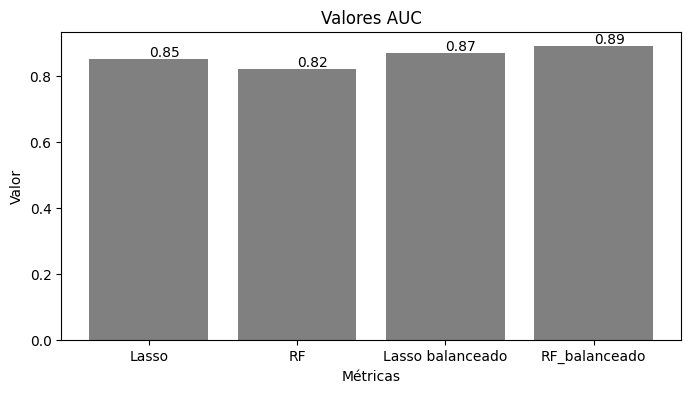

In [ ]:
import matplotlib.pyplot as plt

# Datos
categorias = ['Lasso', 'RF', 'Lasso balanceado', 'RF_balanceado']
valores = [0.85, 0.82, 0.87, 0.89]

# Configuración de la gráfica
plt.figure(figsize=(8, 4))  # Tamaño de la gráfica
plt.bar(categorias, valores, color='grey')  # Crear gráfico de barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Añadir etiquetas y título
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Valores AUC')

# Mostrar gráfica
plt.show()


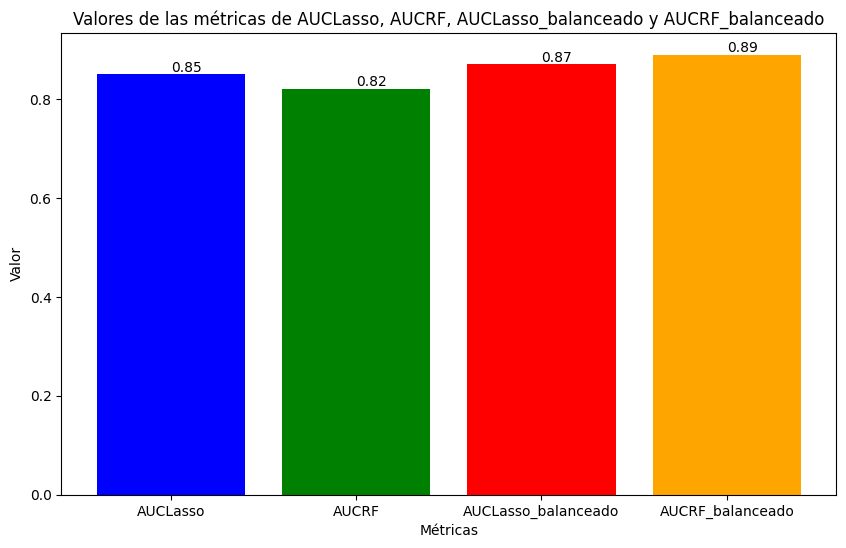

In [ ]:
import matplotlib.pyplot as plt

# Datos
categorias = ['AUCLasso', 'AUCRF', 'AUCLasso_balanceado', 'AUCRF_balanceado']
valores = [0.85, 0.82, 0.87, 0.89]

# Configuración de la gráfica
plt.figure(figsize=(10, 6))  # Tamaño de la gráfica
bars = plt.bar(categorias, valores, color=['blue', 'green', 'red', 'orange'])  # Crear gráfico de barras

# Agregar etiquetas de valores
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Añadir etiquetas y título
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Valores de las métricas de AUCLasso, AUCRF, AUCLasso_balanceado y AUCRF_balanceado')

# Mostrar gráfica
plt.show()